In [1]:
### BEGIN hide_toggle
### Update 30/10-'20
def hide_toggle_code(off=0):
    """This function generates HTML code to toggle the display of an input
    cell.
    
    The output of the cell will still be displayed.  This can be used
    to hide (from immediate view) some code to generate data or the
    like.  It can also be used to hide other notebook explicit
    implementations - e.g., C++ processing, or the like.
    
    Note, calling this function alone will not enable toggling.
    Instead, we must wrap the generated code in an
    `IPython.display.HTML` object and return that as the cell value.
    This will let IPython evaluate the HTML code and pass it on to the
    browser.
    
    If all one wants is to toggle a cell one can use the function
    `hide_toggle` below.  However, we can also combine the code
    generated here with other HTML code - for example _style_
    declarations and pass that along embedded in an HTML object.
    
    Parameters
    ----------
    off : int 
        Offset of cell to hide relative to the cell calling this function 
    
    Returns
    -------
    code : str 
        HTML code to enable toggling of the cell

    """
    from random import randint 
    from IPython.display import HTML 
    
    jp_cell     = 'document.getElementsByClassName("jp-Cell jp-mod-selected")[0]'
    jq_cell     = '$("div.cell.code_cell.rendered.selected")'
    toggle_text = 'Please close'
    cell_id     = str(randint(1,2**64))
    func_name   = f'code_toggle_{cell_id}'
    
    scr1 = f'''
    <script id="s{cell_id}">
      function {func_name}() {{
          if (typeof $ == "undefined") {{
              // console.log("For JupyterLab (no jQuery)")
              var c  = {jp_cell};
              // console.log(c);
              var iw = c.getElementsByClassName("jp-Cell-inputArea")[0];
              var op = c.getElementsByClassName("jp-OutputPrompt")[0];
              // console.log(iw,op)
              if (iw.style.display !== undefined && iw.style.display === "none") {{
                  iw.style.display = null;
                  op.style.display = null;
              }} else {{
                  iw.style.display = "none";
                  op.style.display = "none";
              }}
           }}
           else {{
                console.log('Will toggle input display {jp_cell}')
                console.log({jp_cell})
                {jq_cell}.find("div.input").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.prompt.output_prompt").toggle();
                console.log('End toggle input display {jp_cell}')
           }}
      }}  
    </script>
    '''
    but = f'''
     <details style='z-index:99;position:relative;color:lightgray;' 
             onclick='javascript:{func_name}()'>
        <summary>&gt;</summary>
    </details>
    '''
    scr2 = f'''
    <script>
      var c = null;
      if (typeof $ == "undefined") {{
         var c  = document.getElementById("s{cell_id}");
         var p  = c.parentNode.parentNode.parentNode.parentNode.parentNode;
         var iw = p.getElementsByClassName("jp-Cell-inputArea")[0];
         var op = p.getElementsByClassName("jp-OutputPrompt")[0];
         var ou = c.parentNode;
         iw.style.display = "none";
         op.style.display = "none";
         ou.style.background = "transparent";
      }}
      else {{
          var p = $('#s{cell_id}').parents();
          p.siblings('div.input').hide();
          p.find('div.prompt.output_prompt').hide()
          p.find('div.out_prompt_overlay.prompt').hide()      
      }}
      // {func_name}
    </script>
    '''
    return scr1+but+scr2        

def hide_toggle(off=0,cnt=None):
    """This will wrap the HTML code returned from the above function
    in an `IPython.display.HTML` object so that the notebook will 
    evaluate the HTML code. 
    
    This function is what we will use most of the time.  However, 
    the function `hide_toggle_code` can be combined with other code 
    and then be put  into an HTML object to let the notebook evaluate
    all the code. 

    Parameters 
    ----------
    off : int 
        Cell offset relative to calling cell which we should toggle 
    cnt : int or None 
        If not None, set the execution count to this number 
        (currently broken)
        
    Returns
    -------
    object : IPython.display.HTML 
        HTML object wrapping code to toggle cell 
    """
    from IPython.display import HTML
    if cnt is not None:
        get_ipython().execution_count = cnt
    return HTML(hide_toggle_code(off))
### END hide_toggle


### BEGIN setup_matplotlib
### Update 30/10-'20
def _setup_matplotlib():
    """Set-up Matplotlib parameters. 
    
    We specify that we want both PDF and PNG images, and 
    that the default image size should be 8 by 8 inches 
    
    We also disable warnings about too many open figures 
    """
    %matplotlib inline 
    from matplotlib import rcParams 
    
    rcParams['figure.max_open_warning'] = 0
    rcParams['font.serif'] = ['Palatino'] + rcParams['font.serif']
    rcParams['font.family'] = ['serif']
    rcParams['mathtext.fontset'] = 'dejavuserif'
    rcParams['axes.formatter.use_mathtext'] = True

    f = None
    try:
        # IPython >= 7.23 depcrates set_matplotlib_formats
        from matplotlib_inline.backend_inline import set_matplotlib_formats
        f = set_matplotlib_formats
        
    except Exception as e:
        try:
            from IPython.display import set_matplotlib_formats
            f = set_matplotlib_formats
        except Exception as e:
            pass 

    if f is not None:
        set_matplotlib_formats('png','pdf')
        
_setup_matplotlib()
### END setup_matplotlib
_setup_matplotlib()

### BEGIN css_styling
### Update 30/10-'20
def css_styling_code():
    """This function returns HTML code to customize the CSS 
    of the notebook 
    
    - The text font to be Palatino (serif)
    - Headers are oblique (italic)
    - Extra spacing below H1 headers 
    - Extra spacing spacing above H1 headers 
    - Headers have larger fonts, and is set in normal weight
    - Remove padding around code cells 
    - Code uses the fint "Source Code Pro" (or monospace)
    - Code background is changed to light yellow 
    - Output background is set to lavender
    
    The function combines these CSS declarations with the HTML 
    code from `hide_toggle_code` above so what we automatically 
    hide this code from the user. 
    """
    styles = '''
    <style>
    .rendered_html, .jp-RenderedHTMLCommon {
        font-family: Palatino, serif
    }
    h1, h2, h3, h4, .jp-RenderedHTMLCommon h1, .jp-RenderedHTMLCommon h2, .jp-RenderedHTMLCommon h3, .jp-RenderedHTMLCommon h4{
        font-style: oblique;  
    }
    jp-RenderedHTMLCommon h1:first-child {
        margin-top: 4ex;
    }
    .jp-RenderedHTMLCommon h1, .rendered_html h1 {
        margin-bottom: 2ex;
        font-weight: normal;
        font-size: 220%;
    }
    .jp-RenderedHTMLCommon h2, .rendered_html h2 {
        font-weight: normal;
        font-size: 180%;
    }
    .jp-RenderedHTMLCommon h3, .rendered_html h3 {
        font-weight: normal
    }
    .jp-RenderedHTMLCommon h4, .rendered_html h4 {
        font-weight: normal
    }
    p code {
        padding: 0;
    }
    .CodeMirror, .jp-Notebook .CodeMirror.cm-s-jupyter, code, div.input_area {
        font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
        background: lightyellow;
    }
    .output_text, .output_stream, .output_stdout, .jp-OutputArea-executeResult .jp-OutputArea-output {
        background: lavender;
    }
    .output_error {
        background-color: #fff2f2;
    }
    .celltag_alert-info li {
        list-style-image:  url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAAZiS0dEAP8A/wD/oL2nkwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB9gEGxE4IQYzJ14AAAI3SURBVDjLZZNPSFVBFIe/e9+zd3silBCl0SZoU4s2rVq0EB5tQip4UNvATVGu3QRBiyAi2iltWkgbF5EgRhFFRpiWtrWIzDIV1Pzz7p15M2fmtvDevOqBw8DM9zvnN8ycgF3R/eDtM2mac96ZdrFNxBikqbRV+vHH/ut9gAZczoe7C3gnF0f6au1OLM5avFi8d1Ea+JvAMSAq8nsKOGs5f2cYJ3Y7rc2PO4BqkS8DdD98f9tbe1ysCoxOBo1qlEXHJWcM4b5KPU19zleA0o4Clx99eO3EdqVewHsCoFRugUoVghJO7A6H6Vx9wdtYi27cr5x6dy/03nVtWTU7bWeZh6jNUcAiCaFTURl9A+gs56AviHzh3mnqtdPxm6knfQPLU7UaokASQq/agY7yDrG16Mba6Pz48NP56VdrgAApYObGaicPtkovToFLQBKA/WUxTe3FRk4san15aGKgd3Dj560rrdGJS6FT0X9YYvLuiMKL1kAQOpHZ3PqfyZfP41+9PW1VfzX0RXFSECfgNEmSTgImdDruF2O0E8vvqZG1auQubAsKooIYYHpGvwA2g+xndQBHgWa6cG0ih5cW/w6VvEq3nChwCoBvs+bL2Z7VceBHGTDAIrABpMVuhw+4OiLgLIglOLPYBTQAlfErIeCzjRVg1dtEb1kt5Omv+DTV2YssAN+zNdkzC42N9brV8WdvYp07seOdM2Of1F3AAknW0AJpwN6IgEPAEaANaMlcbmZdl7KRBuAfAb+v//yMAJoAAAAASUVORK5CYII=);
    }
    </style>
    <script>
    if (typeof $ !== "undefined") {
  $(function(){
 $(".celltag_alert         .text_cell_render").addClass("alert");
 $(".celltag_alert-info    .text_cell_render").addClass("alert alert-info");
 $(".celltag_alert-warning .text_cell_render").addClass("alert alert-warning");
 $(".celltag_alert-danger  .text_cell_render").addClass("alert alert-danger");
 $(".celltag_alert-success .text_cell_render").addClass("alert alert-successs");
      });
    }
    </script>
    '''
    return styles

def css_styling():
    from IPython.display import HTML 
    
    return HTML(hide_toggle_code()+css_styling_code())
### END css_styling
css_styling()

### Christian Holm Christensen <a class='tocSkip'></a>

# Symbolic manipulation in Python <a class='tocSkip'></a>
## using SymPy<a class='tocSkip'></a>
## Version 0.1 - September, 2019 (English)<a class='tocSkip'></a>

> In this notebook, we will go through some basic symbolic manipulations using the Python 
> library [SymPy](https://sympy.org).   The syntax is regular 
> [Python](https://cholmcc.gitlab.io/nbi-python#Python) syntax, but instead of doing numerical computations, 
> we will manipulate mathematical symbolic expression. 
>
> This notebook is available in many different formats at 
> [https://cholmcc.gitlab.io/nbi-python](https://cholmcc.gitlab.io/nbi-python)

### Niels Bohr Institute <a class='tocSkip'></a>

### Christian Holm Christensen <a class='tocSkip'></a>

# Symbolisk manipulation i Python <a class='tocSkip'></a>
## ved hjælp af SymPy<a class='tocSkip'></a>
## Version 0.1 - september, 2019 (Dansk)<a class='tocSkip'></a>

> I denne notesbog vil vi gennemgå nogle grundlæggende symbolske manipulationer ved hjælp af Python
> bibliotek [SymPy](https://sympy.org). Syntaks er almindelig
> [Python](https://cholmcc.gitlab.io/nbi-python#Python) syntaks, men i stedet for at lave numeriske beregninger,
> vi vil manipulere matematisk symbolisk udtryk.
>
> Denne notebook er tilgængelig i mange forskellige formater på
> [https://cholmcc.gitlab.io/nbi-python](https://cholmcc.gitlab.io/nbi-python)

### Niels Bohr Institute <a class='tocSkip'></a>

# Introduction

# Introduktion

*SymPy*, like *NumPy* or *SciPy*, is a library of Python functionality that we can import into a program as we see fit.  Most libraries that we are use to deal with numerical computations. *SymPy* is different in that it defines classes, functions, etc. to do symbolic manipulation of mathematical expression. 

Here, we will make some examples of how to use *SymPy* relevant for 1st year calculus and linear algebra. 

*SymPy*, ligesom *NumPy* eller *SciPy*, er et bibliotek med Python-funktionalitet, som vi kan importere i et program, som vi finder det passende. De fleste biblioteker som vi bruger, er til at håndtere numeriske beregninger.  *SymPy* er anderledes i at definerer klasser, funktioner osv. til at udføre symbolsk manipulation af matematiske udtryk.

Her vil vi vise nogle eksempler på, hvordan man bruger *SymPy* relevant for 1. års kalkulus og lineær algebra.

But first, we import *SymPy* into our notebook.

Men først importerer vi *SymPy* til vores notebook.

In [2]:
from sympy import *
init_printing(use_latex='mathjax')

We need to declare some variables.  *SymPy* has a special submodule for this that allows quick definition of variables, so let's use those to get started.  

Vi vil at erklære nogle variabler. *SymPy* har et specielt undermodul til dette, der tillader hurtig definition af variabler, så lad os bruge dem til at komme i gang.

In [3]:
from sympy.abc import x,y,z,a,b,c,n,i

Let us print out these variables.  

Lad os udskrive disse variabler.

In [4]:
x,y,z,a,b,c,n,i

(x, y, z, a, b, c, n, i)

# Calculus

# Kalculus

Calculus is the discipline of Mathematics that deals with limits, derivatives, integrals, and the like.  The fundamental theorem of calculus states 

> 1. Let $f$ be continuous on the interval $I$ and let $c\in I$.  Then the function 
>
>    $$A(x) = \int_c^{x}\mathrm{d}t\,f(t)\quad,$$
>
>    is continuous and differentiable on the inner of $I$. We have that 
>
>    $$\frac{\mathrm{d}A(x)}{\mathrm{d}x} = f(x)\quad,$$ 
> 
>    for all $x$ in the inner of $I$
>
> 2. If $F$ and $f$ are continuous on $[a,b]$ and $\mathrm{d}F(x)/\mathrm{d}x = f(x)$ for all $x\in(a,b)$, then 
>
>    $$\int_{a}^{b}\mathrm{d}x\,f(x) = F(b)-F(a)\quad.$$

Kalculus er den disciplin i matematik, der beskæftiger sig med grænser, afledte, integraler og lignende. _Analyses hovedsætning_ er

> 1. Lad $f$ være kontinuerlig på intervallet $I$ og lad $c\in I$. Så er funktionen
>
> $$A(x) = \int_c^{x}\mathrm{d}t\,f(t)\quad,$$
>
> er kontinuerlig og differentierbar på det indre af $I$. Vi har at
>
> $$\frac{\mathrm{d}A(x)}{\mathrm{d}x} = f(x)\quad,$$
>
> for alle $x$ i det indre af $I$
>
> 2. Hvis $F$ og $f$ er kontinuerlige på $[a,b]$ og $\mathrm{d}F(x)/\mathrm{d}x = f(x)$ for alle $x\in(a,b)$, så
>
> $$\int_{a}^{b}\mathrm{d}x\,f(x) = F(b)-F(a)\quad.$$

## Sums, series, sequences

## Summer, serier, sekvenser

We can define a sum by 

Vi kan definere en sum ved

In [5]:
s = Sum((-1)**(n-1)*x**(2*n-1)/factorial(2*n-1),(n,1,oo))
s

  ∞                     
 ____                   
 ╲                      
  ╲       n - 1  2⋅n - 1
   ╲  (-1)     ⋅x       
   ╱  ──────────────────
  ╱       (2⋅n - 1)!    
 ╱                      
 ‾‾‾‾                   
n = 1                   

We can evaluate the sum by calling the method `doit`.  Let's see what the sum above converges to

Vi kan evaluere summen ved at kalde metoden `doit`. Lad os se, hvad summen ovenfor konvergerer til

In [6]:
s.doit()

sin(x)

Similarly, we can find series expansion of an expression around some point to some order $n$, by doing 

Tilsvarende kan vi finde serieudviklinter af et udtryk omkring et punkt til en orden $n$ ved

In [7]:
s = series(cos(x),x,0,n=10)
s

     2    4     6      8          
    x    x     x      x      ⎛ 10⎞
1 - ── + ── - ─── + ───── + O⎝x  ⎠
    2    24   720   40320         

Notice the big-$O$ notation for the _order_ of the $\cos(x)$ expansion, which means the rest of the terms are no larger than $M\,x^{10}$ for some finite $M$. More formally, the order of a function $g(x)$ around a point $x_0$ is given by 

$$g(x) = O(f(x))\quad\mathrm{for}\quad x\rightarrow a\quad,$$ 

if and only if 

$$\forall \delta > 0\ \exists\, M>0:\ |x-a|<\delta\Rightarrow|g(x)|\leq M|f(x)|\quad.$$

That is for any $\delta>0$, there exists an $M>0$ so that if $|x-a|<\delta$, then $|g(x)|\leq M|f(x)|$, or equivalently 

$$\lim_{x\rightarrow a} \sup|g(x)/g(x)| < \infty\quad.$$

Bemærk store $O$-notation for _ordnen_ af $\cos(x)$-udviklingen, hvilket betyder, at resten af udtrykkene ikke er større end $M\,x^{10}$ for et endeligt $M$. Mere formelt er ordnen af en funktion $g(x)$ omkring et punkt $x_0$ givet af

$$g(x) = O(f(x))\quad\mathrm{for}\quad x\rightarrow a\quad,$$ 

hvis og kun hvis

$$\forall \delta > 0\ \exists\, M>0:\ |x-a|<\delta\Rightarrow|g(x)|\leq M|f(x)|\quad.$$

Det vil sige, for enhvert $\delta>0$, findes der et $M>0$, så hvis $|x-a|<\delta$, så $|g(x)|\leq M|f(x)|$, eller ækvivalent

$$\lim_{x\rightarrow a} \sup|g(x)/g(x)| < \infty\quad.$$

Using this, let us see that 

Ved hjælp af dette, lad os se at

In [8]:
s=series(sin(x),x,0,7)
s

     3     5        
    x     x     ⎛ 7⎞
x - ── + ─── + O⎝x ⎠
    6    120        

Thus, we calculate the ratio of 

\begin{align*}
g(x) &= O(x^7) = -\frac{x^7}{7!}+\frac{x^9}{9!}+\ldots\\
f(x) &= x^7\quad,
\end{align*}

and take the limit of the absolute value of that ratio.

Vi beregner forholdet mellem

\begin{align*}
g(x) &= O(x^7) = -\frac{x^7}{7!}+\frac{x^9}{9!}+\ldots\\
f(x) &= x^7\quad,
\end{align*}

og tage grænsen af den absolutte værdi af forholdet.

In [9]:
l = Limit(abs((-x**7/factorial(7)+x**9/factorial(9)-x**11/factorial(11))/x**7),x,0)
l

     │   11         9       7 │
     │  x          x       x  │
     │──────── - ────── + ────│
     │39916800   362880   5040│
 lim │────────────────────────│
x─→0⁺│            7           │
     │           x            │

which evaluates to 

hvilket evaluerer til

In [10]:
l.doit()

1/5040

Or, by using the definition of big-$O$ it self 

Eller ved at bruge definitionen på store-$O$ selv

In [11]:
limit(O(x**7)/x**7,x,0)

O(1)

which gives us $O(1)$ which is clearly a finite number. Thus, we can, for any $\delta>0$ find an $M>0$ such that the above condition is met.

hvilket giver os $O(1)$, som helt klart er endeligt. Vi kan altså for ethvert $\delta>0$ finde et $M>0$ således, at betingelsen ovenover er opfyldt.

Above we used the _SymPy_ functionality of taking limits.  Let us do a few more limits 

Ovenover brugte vi _SymPy_ funktioner til at finde grænser. Lad os finde et par flere grænser

In [12]:
l = Limit(sin(x)/x,x,0)
Eq(l,l.doit())

     ⎛sin(x)⎞    
 lim ⎜──────⎟ = 1
x─→0⁺⎝  x   ⎠    

We can also do limits from the left (`-`) or the right (`+`)

Vi kan også finde grænser fra venstre (`-`) eller højre (` + `)

In [13]:
lm = Limit(1/x,x,0,dir='-')
Eq(lm,lm.doit())

     1     
 lim ─ = -∞
x─→0⁻x     

In [14]:
lp = Limit(1/x,x,0,dir='+')
Eq(lp,lp.doit())

     1    
 lim ─ = ∞
x─→0⁺x    

Above, we have used `Eq` to express the equalities. 

Ovenfor har vi brugt `Eq` til at udtrykke ligheder.

## Differentiation

## Differentiering

### A second degree polynomial 

We can define expressions using defined variables for example, a second degree polynomial 

### Et andet grads polynom

Vi kan definere udtryk ved hjælp af variable, for eksempel et andengrads polynom

In [15]:
p2 = a*x**2 + b*x + c
p2

   2          
a⋅x  + b⋅x + c

We can differentiate this with respect to $x$ 

$$\frac{\mathrm{d}}{\mathrm{d}x} ax^2+bx+c\quad,$$

by using the function `diff` like so

Vi kan differentiere dette med hensyn til $x$

$$\frac{\mathrm{d}}{\mathrm{d}x} ax^2+bx+c\quad,$$

ved at bruge funktionen `diff`

In [16]:
diff(p2,x)

2⋅a⋅x + b

### Higher order differentials 

We can also differentiate multiple times - e.g., twice 

$$\frac{\mathrm{d}^2}{\mathrm{d}x^2}ax^2+bx+c\quad,$$

by any of

### Højere ordensdifferentialer

Vi kan også differentiere flere gange - for eksempel to gange

$$\frac{\mathrm{d}^2}{\mathrm{d}x^2}ax^2+bx+c\quad,$$

på flere måder 

In [17]:
diff(p2,x,2), diff(p2,x,x), diff(diff(p2,x),x),p2.diff(x,2)

(2⋅a, 2⋅a, 2⋅a, 2⋅a)

Of course, we are not restricted to differentiate with respect to $x$.  We can pass any variable we like, for example, we can calculate 

Vi er selvfølgelig ikke begrænset til at differentiere med hensyn til $x$. Vi kan give andre variable, for eksempel

$$\frac{\mathrm{d}}{\mathrm{d}a},\quad\frac{\mathrm{d}}{\mathrm{d}\mathrm{b}},\quad \frac{\mathrm{d}}{\mathrm{d}y}\quad,\frac{\mathrm{d}^2}{\mathrm{d}a\mathrm{d}b}\quad.$$

In [18]:
p2.diff(a), p2.diff(b), p2.diff(y), p2.diff(a,b)

⎛ 2         ⎞
⎝x , x, 0, 0⎠

### Differentials of expressions

We do not need to define an expression - we can simple differentiate any given expression as is 

### Differentiation af udtryk

Vi behøver ikke at definere et udtryk - vi kan differentiere ethvert givet udtryk

In [19]:
(a*log(b*x)+c*x).diff(x)

a    
─ + c
x    

Or we can assign the calculated derivative to a new variable 

Vi kan tildele det beregnede afledte til en ny variabel

In [20]:
dp2 = p2.diff(x)
dp2

2⋅a⋅x + b

### Unknown function 

Sometimes we are working with an unknown function $f$.  Let us define such a function 

### Ukendte funktion

Nogle gange arbejder vi med en ukendt funktion $f$. Lad os definere en sådan funktion

In [21]:
f = Function('f')

The variable `f` now represents the unknown function $f$

Variablen `f` repræsenterer nu den ukendte funktion $f$

In [22]:
f(x)

f(x)

We can of course differentiate that 

Vi kan selvfølgelig differentiere funktionen

In [23]:
f(x).diff(x)

d       
──(f(x))
dx      

Even multiple times 

Også flere gange

In [24]:
f(x).diff(x,4)

  4      
 d       
───(f(x))
  4      
dx       

### A piece-wise function

### En stykkevis funktion

We can also differentiate piece-wise (forked) functions

Vi kan også differentiere stykkevise (gafflede) funktioner

In [25]:
dp = Piecewise((exp(a*x),x>a),(log(x),x<a)).diff(x)
dp

⎧   a⋅x           
⎪a⋅ℯ     for a < x
⎪                 
⎨  1              
⎪  ─     for a > x
⎪  x              
⎩                 

## Interlude - plotting

## Mellemspil - grafer

Above we saw how we can differentiate expression.   Sometimes, it's also useful to be able to plot an expression. Let's plot a few things. 

Ovenfor så vi, hvordan vi kan differentiere udtryk. Nogle gange er det også nyttigt at være i stand til at tegne et udtryk. Lad os tegne lidt forskelligt

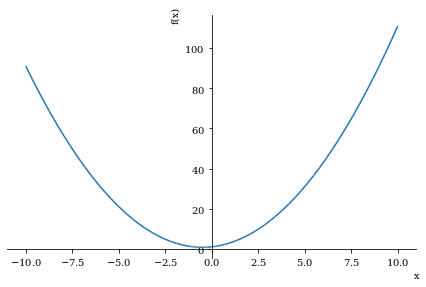

In [26]:
plot(x**2+x+1);

We can limit the range 

Vi kan begrænse rækkevidden

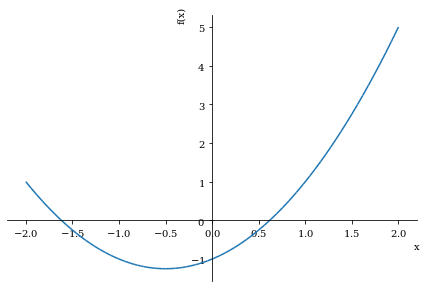

In [27]:
plot(x**2+x-1,(x,-2,2));

In fact, we can also do 3D plotting.  Let's try it out 

Faktisk kan vi også lave 3D-plots. Lad os prøve det

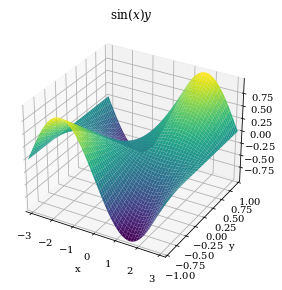

In [28]:
from sympy.plotting import plot3d
plot3d(sin(x)*y,(x,-pi,pi),(y,-1,1),
       xlabel='x',ylabel='y',zlabel='z',
       title=r'$\sin(x)y$');

## Integration

We can use *SymPy* to find indefinite integrals.  Let us do 

$$\int\mathrm{d}x\,\sin(x)\quad.$$

## Integration

Vi kan bruge *SymPy* til at finde ubestemte integraler. Lad os beregne 

$$\int\mathrm{d}x\,\sin(x)\quad.$$

In [29]:
integrate(sin(x),x)

-cos(x)

Or we can do definite integrals.  For example (`oo` is $\infty$)

$$\int_0^{\infty} \mathrm{d}x \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}\quad,$$ 

Eller vi kan beregne bestemte integraler. For eksempel (`oo` is $\infty$)

$$\int_0^{\infty} \mathrm{d}x \frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}\quad,$$

In [30]:
integrate(1/sqrt(2*pi)*exp(-x**2/2),(x,0,oo))

1/2

Sometimes, we need to make some assumptions to be able to solve an integral.  For example 

Nogle gange er vi nødt til at lave nogle antagelser for at kunne løse et integral. For eksempel

In [31]:
sigma = symbols('sigma')
g = 1/(sqrt(2*pi)*sigma)*exp(-x**2/(2*sigma**2))
g.integrate((x,0,oo))

⎧                                π
⎪     1/2       for 2⋅│arg(σ)│ ≤ ─
⎪                                2
⎪                                 
⎪∞                                
⎪⌠                                
⎪⎮       2                        
⎪⎮     -x                         
⎨⎮     ────                       
⎪⎮        2                       
⎪⎮     2⋅σ                        
⎪⎮ √2⋅ℯ                           
⎪⎮ ──────── dx      otherwise     
⎪⎮  2⋅√π⋅σ                        
⎪⌡                                
⎪0                                
⎩                                 

Above, we can assume that $\sigma>0$  so let's add that in

Ovenfor kan vi antage, at $\sigma>0$, så lad os tilføje det ind

In [32]:
sigma = symbols('sigma',positive=True)
g.subs(dict(sigma=sigma)).integrate((x,0,oo))

1/2

Note, we have to substitute the new definition of $\sigma>0$ in. 

Bemærk, vi skal erstatte med den nye definition det positive $\sigma$.

When we do `integrate` or `diff` _SymPy_ will evaluate the integral or derivative.  If we want an _unevaluated_ expression, we can do 

Når vi integrerer eller diffrentierer med henholdsvis `integrate` og `diff` vil _SymPy_ evaluere integralet eller den afledte. Hvis vi ønsker et _ikke-vurderet_ udtryk, kan vi også gøre det

In [33]:
i = Integral(1/sqrt(2*pi)*exp(-x**2/2),(x,0,oo))
d = Derivative(sin(x)/x,x)
i, d

⎛∞                        ⎞
⎜⌠                        ⎟
⎜⎮       2                ⎟
⎜⎮     -x                 ⎟
⎜⎮     ────               ⎟
⎜⎮      2                 ⎟
⎜⎮ √2⋅ℯ         d ⎛sin(x)⎞⎟
⎜⎮ ──────── dx, ──⎜──────⎟⎟
⎜⎮   2⋅√π       dx⎝  x   ⎠⎟
⎜⌡                        ⎟
⎝0                        ⎠

We can evaluate these by calling the method `doit` on the expressions 

Vi kan evaluere disse ved at kalde metoden `doit` på udtrykkene

In [34]:
i.doit(), d.doit()

⎛     cos(x)   sin(x)⎞
⎜1/2, ────── - ──────⎟
⎜       x         2  ⎟
⎝                x   ⎠

# A Proof 

# Et bevis

Let us prove that 

Lad os bevise at

In [35]:
i, n = symbols('i n',int=True)
s = Sum(x**i,(i,0,n))
Eq(s,s.doit().args[1][0]),Not(Eq(x,1))

⎛  n                         ⎞
⎜ ___                        ⎟
⎜ ╲              n + 1       ⎟
⎜  ╲    i   1 - x            ⎟
⎜  ╱   x  = ──────────, x ≠ 1⎟
⎜ ╱           1 - x          ⎟
⎜ ‾‾‾                        ⎟
⎝i = 0                       ⎠

by means of _induction_ (courtesy T.Lindstrøm _Kalkulus_).  

ved hjælp af _induktion_ (fra T.Lindstrøm _Kalkulus_).

For $x=1$, the sum converges to $n+1$, so `s.doit()` really evaluates to a piece-wise expression.  We take out the second of the expressions by means of `.args[1][0]` above and will do the same below. 

First, we show that the relation holds for $n=1$ 

For $x=1$ konvergerer summen til $n+1$, så `s.doit ()` evaluerer til et stykkevis udtryk. Vi tager det andet af udtrykkene ved hjælp af `.args[1][0]` ovenfor og vil gøre det samme nedenunder.

Første viser vi at ligheden gælder for $n=1$

In [36]:
Eq(Subs(s,n,1).doit().args[1][0],(1-x**2)/(1-x))

True

Thus, we see the statement holds for $n=1$. 

 Let us assume that the statement holds for $n=k$, and see if it also holds for $n=k+1$. 

Vi ser således, at udsagnet gælder for $n=1$.

Lad os antage, at udsagnet gælder for $n=k$, og vise det også gælder for $n=k+1$.

In [37]:
k = symbols('k',int=True)
sk = Subs(s,n,k).doit().args[1][0]
Eq(Subs(s,n,k),sk)

⎛  n     ⎞│                
⎜ ___    ⎟│                
⎜ ╲      ⎟│           k + 1
⎜  ╲    i⎟│      1 - x     
⎜  ╱   x ⎟│    = ──────────
⎜ ╱      ⎟│        1 - x   
⎜ ‾‾‾    ⎟│                
⎝i = 0   ⎠│n=k             

To this, we should add the $k+1$ term, to get 

Til dette ligger vi $k+1$-udtrykket til og får

In [38]:
Eq(Subs(s,n,k+1),sk + x**(k+1))

⎛  n     ⎞│                             
⎜ ___    ⎟│                             
⎜ ╲      ⎟│                        k + 1
⎜  ╲    i⎟│           k + 1   1 - x     
⎜  ╱   x ⎟│        = x      + ──────────
⎜ ╱      ⎟│                     1 - x   
⎜ ‾‾‾    ⎟│                             
⎝i = 0   ⎠│n=k + 1                      

Let us multiply both terms with $(1-x)$, simplify, and then divide by $(1-x)$

Lad os multiplicere begge udtryk med $(1-x)$, forenkle og derefter dele med $(1-x)$

In [39]:
sk1 = (sk*(1-x) + x**(k+1)*(1-x)).simplify()/(1-x)
sk1

     k + 2
1 - x     
──────────
  1 - x   

Thus, we see that 

Vi ser altså at 

In [40]:
Eq(Subs(s,n,k+1).doit().args[1][0],sk1)

True

and we have proven the above equation. 

og vi har bevist udsagnet. 

# More to come ...

# Mere på vej ...